# Amazon Reviews Model

## Data Preprocessing


In [6]:
!pip install pandas
!pip install numpy
!pip install nltk


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# Read the CSV files
train_df = pd.read_csv('train.csv', names=['polarity', 'title', 'text'])
test_df = pd.read_csv('test.csv', names=['polarity', 'title', 'text'])

# Remove special characters
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text)

# Apply text cleaning
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

train_df['clean_text'] = train_df['clean_text'].apply(remove_stopwords)
test_df['clean_text'] = test_df['clean_text'].apply(remove_stopwords)


## Exploratory Data Analysis (EDA)

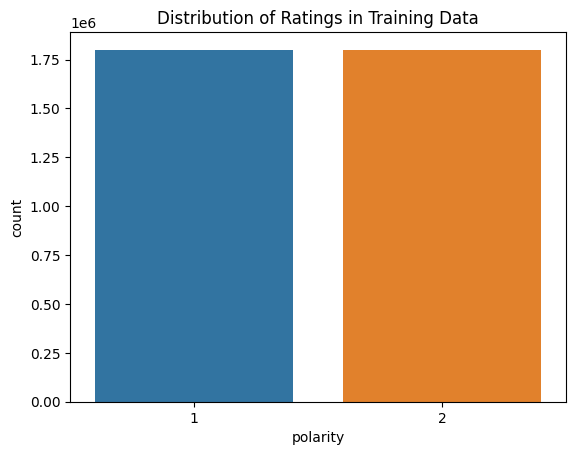

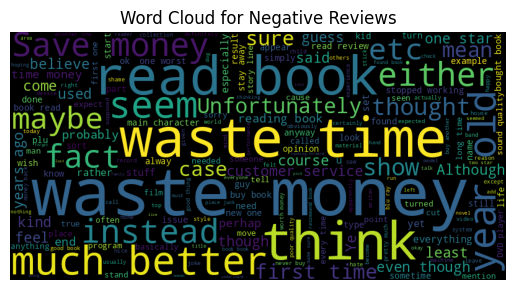

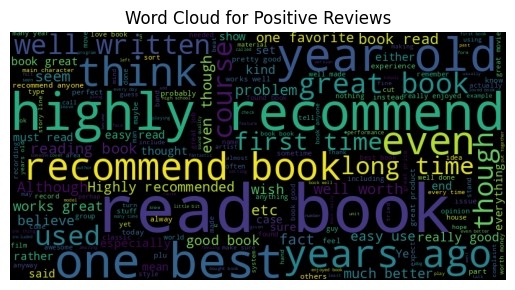

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Rating Distribution
sns.countplot(x='polarity', data=train_df)
plt.title('Distribution of Ratings in Training Data')
plt.show()

# Word cloud for Positive and Negative Reviews
for polarity in [1, 2]:
    text = ' '.join(train_df[train_df['polarity']==polarity]['clean_text'].tolist())
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.imshow(wordcloud)
    plt.title(f'Word Cloud for {"Positive" if polarity==2 else "Negative"} Reviews')
    plt.axis('off')
    plt.show()


## Feature Engineering

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])

y_train = train_df['polarity']
y_test = test_df['polarity']

## Model Training

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8202075
F1 Score: 0.8202074757178959


## Fine-Tuning

In [13]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and the respective values we want to test
parameters = {'alpha': [0.5, 1.0, 1.5, 2.0]}

# Creating the classifier
clf = MultinomialNB()

# Using GridSearchCV to search for the best hyperparameters
grid_clf = GridSearchCV(clf, parameters, cv=5)
grid_clf.fit(X_train, y_train)

# Get the best model
best_clf = grid_clf.best_estimator_

# Evaluate the model
y_pred = best_clf.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Tuned Accuracy: 0.82024
Tuned F1 Score: 0.8202399726584999
